In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt



def save_plot(name, expr):
    data_taco = json.load(open(f'{name}/taco'))
    df_taco = pd.DataFrame(data_taco["benchmarks"])
    df_taco = df_taco[df_taco['aggregate_name'] == "mean"]

    data_blas = json.load(open(f'{name}/blas'))
    df_blas = pd.DataFrame(data_blas["benchmarks"])
    df_blas = df_blas[df_blas['aggregate_name'] == "mean"]

    data_tblis = json.load(open(f'{name}/tblis'))
    df_tblis  = pd.DataFrame(data_tblis["benchmarks"])
    df_tblis = df_tblis[df_tblis['aggregate_name'] == "mean"]

    df = pd.DataFrame(df_tblis["real_time"]/df_taco["real_time"])
    df = df.join(pd.DataFrame(df_blas["real_time"]/df_taco["real_time"]), lsuffix='_tblis', rsuffix='_blas')
    df = df.reset_index(drop=True)
    df = df.rename_axis('dimension').reset_index()
    df['dimension'] = df['dimension']*20

    df.plot(kind = 'line', x = 'dimension', y = ['real_time_tblis', 'real_time_blas'])

    plt.title(expr)

    plt.savefig(f'{name}.png')


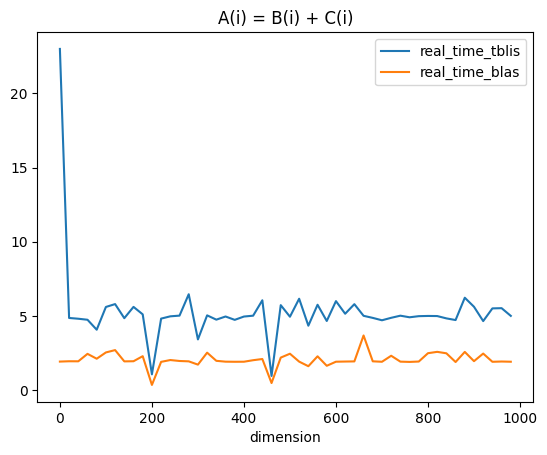

In [90]:
save_plot("saxpy", "A(i) = B(i) + C(i)")

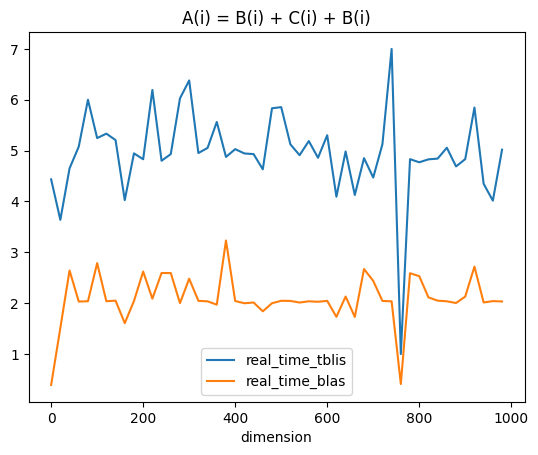

In [91]:
save_plot("unfused_saxpy", "A(i) = B(i) + C(i) + B(i)")

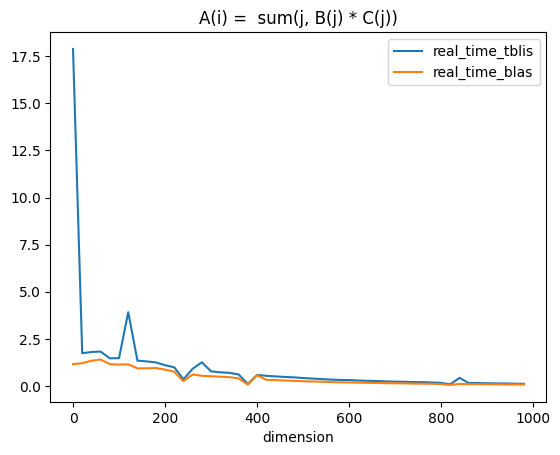

In [94]:
save_plot("dot", "A(i) =  sum(j, B(j) * C(j))")

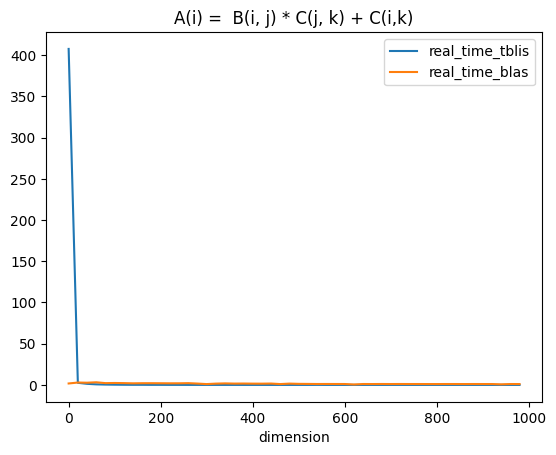

In [97]:
save_plot("sgemm", "A(i) =  B(i, j) * C(j, k) + C(i,k)")

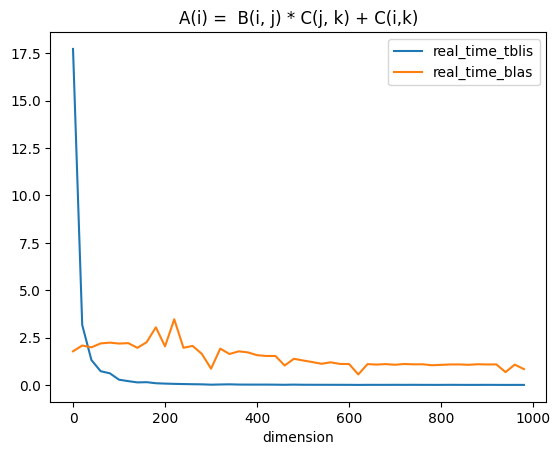

In [99]:
save_plot("sgemm_2", "A(i) =  B(i, j) * C(j, k) + C(i,k)")

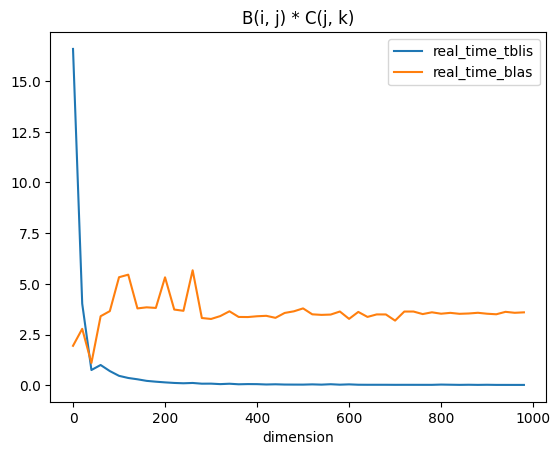

In [103]:
save_plot("mm", "B(i, j) * C(j, k)")